# Digitaalse maailma pilt - VÄRVID 

In [1]:
from google.colab import files
import pandas as pd

files.upload()

Saving lena160.bmp to lena160.bmp


{'lena160.bmp': b'BM8,\x01\x00\x00\x00\x00\x006\x00\x00\x00(\x00\x00\x00\xa0\x00\x00\x00\xa0\x00\x00\x00\x01\x00\x18\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12\x0b\x00\x00\x12\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x18WK\x1a^>\x1f`B\x19[Y6v\x98\x9f\xc9\xb4\xc1\xde\xb2\xc0\xde\xa9\xbc\xdb\x83\x94\xc3YR\xa8^g\xd1m\x88\xe4x\x98\xeb\x7f\xa1\xed\x7f\xa2\xed\x80\xa4\xee\x80\xa3\xf1v\x8f\xe0\\H\x99M\'kJ b;\x0fPD\x1f`F\x1e\\I\x1e[P%eR&kT(qX/uY.qO\x1faj5w\x90m\x90d<wP\x1edS gyR\x8aZ*eY*kj>y\x8c`\x8e[$c\x85c\x8f_9q@\x11PM\x1d_]4vV,iI\x1aYV(ho>wjE}tS\x8bM\'w;%\x89@3\x9cB6\xa6D=\xb1HH\xbdKL\xc5PP\xcaRS\xceRX\xceRY\xd0RZ\xd2U]\xd2X\\\xd0V\\\xd2V]\xd5W^\xd5U]\xd7Zb\xd8\\b\xd8X`\xdaX`\xdc]d\xdd_h\xdf^c\xdd[a\xde]d\xdeaf\xdffi\xe0el\xdfek\xe0gp\xe1hq\xe2ip\xe0ip\xdfio\xe0ks\xe1js\xe0iu\xe1lz\xe1lw\xe1jw\xdfmy\xdfkx\xe0oy\xdepz\xdfs\x82\xe0q\x7f\xe0u\x83\xe2{\x88\xe1\x82\x8d\xe0\x80\x8e\xe0\x85\x93\xe0\x8b\x97\xe1\x8d\x9d\xe0\x95\xa7\xe1\x9c\xaf\xe2\xa3\xb4\xe5\xa9\xb8\xe5\xaf\xbc\xe6\xb3\xc0\xe9\xb

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
img = cv.imread("lena160.bmp", 1)[...,::-1] #BGR-st tehakse RGB, ümberpööramine, bmp-failis on värvikanalid teises BGR järjekorras.

In [4]:
print(img.shape)

(160, 160, 3)


Näeme, et pilt on 160 x 160 pikslit ja sel on 3 värvikanalit.

Veendume, et tegemist on sama pildiga.

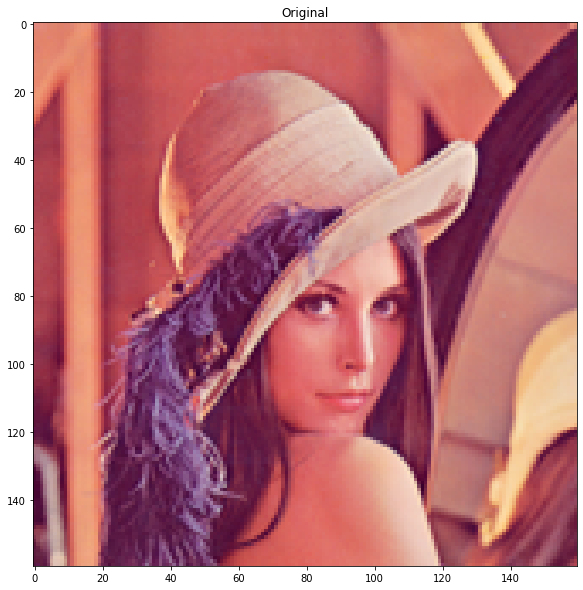

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(111),plt.imshow(img),plt.title('Original')
plt.show()

Aga kus on bitijadad kolmes värvikanalis?

In [8]:
# 3D massiiv
print(img)

[[[225 137 128]
  [225 135 124]
  [228 139 124]
  ...
  [201 100 102]
  [233 146 129]
  [225 136 113]]

 [[225 137 126]
  [225 134 122]
  [228 138 121]
  ...
  [203 102 102]
  [228 137 122]
  [208 117 105]]

 [[225 132 112]
  [225 133 115]
  [227 134 116]
  ...
  [186  86  90]
  [140  53  77]
  [106  32  70]]

 ...

 [[ 92  26  62]
  [ 98  30  64]
  [ 99  32  65]
  ...
  [104  30  62]
  [109  31  62]
  [134  45  69]]

 [[ 91  27  61]
  [ 94  28  58]
  [ 99  32  66]
  ...
  [111  36  64]
  [136  50  72]
  [159  61  75]]

 [[ 87  24  64]
  [ 94  26  75]
  [ 96  31  62]
  ...
  [129  54  78]
  [160  66  84]
  [177  69  81]]]


In [9]:
# 1. piksli värvid RGB
print(img[0,0])
# Kusagilt keskelt
print(img[110, 110])
print(img[100,40])
# Viimase piksli värvid
print(img[159, 159])

[225 137 128]
[136  53  74]
[151 114 161]
[177  69  81]


## Pildi töötlemine - teeme must-valgeks

Pildi värvide, teravuse, helduse, tumeduse jne töötlemine tähendab sageli, et muudatakse piksli väärtusi.

Me saame teha meie värvilisest pildist mustvalge. Võtame selleks värvikanalite vektorid pildist välja ja muudame nende väärtus.

Enne vaatame korraks, millised erinevad värvikanalid välja näevad. Igal pildil on alles jäetud vastava värvikanali väärtus, teised kanalid on väärtustatud 0-dega.


In [18]:
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]


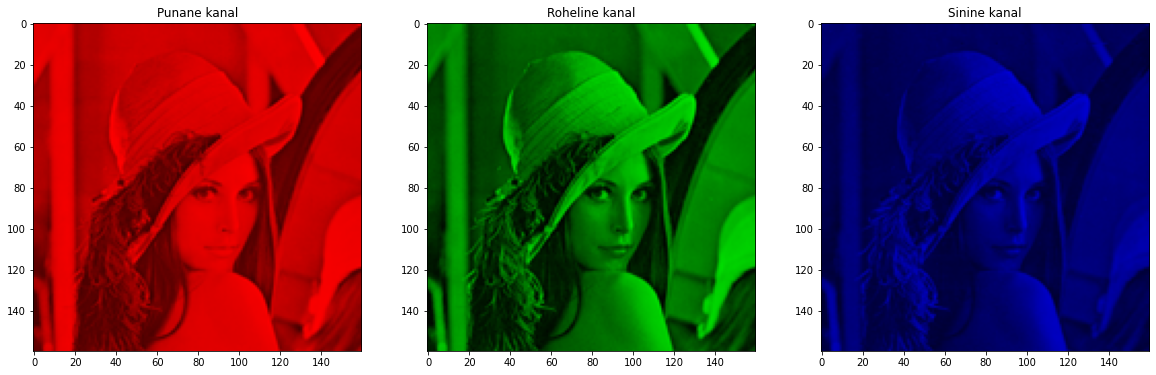

In [19]:
# Üks kanal on välja võetud, teised on väärtustatud 0-dega.
im_r = np.zeros(np.shape(img))  # nullidega täidetud maatriks
im_r[:, :, 0] = img[:, :, 0]    # R väärtustatakse
im_g = np.zeros(np.shape(img))  
im_g[:, :, 1] = img[:, :, 1]    # G väärtustatakse
im_b = np.zeros(np.shape(img))
im_b[:, :, 2] = img[:, :, 2]    # B väärtustatakse

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(im_r.astype(int)),plt.title('Punane kanal')
plt.subplot(132),plt.imshow(im_g.astype(int)),plt.title('Roheline kanal')
plt.subplot(133),plt.imshow(im_b.astype(int)),plt.title('Sinine kanal')
plt.show()


Must-valge pildi saamiseks konventeerime RGB YUV-sse, kuid meil on vaja ainult Y väärtust, sest ei ole Y elemendis, see on U ja V elemendis. Y ongi hallides toonides, nagu meil vaja on.

R väärtusi korrutame 0.2989

G väärtusi korrutame 0.5870

B väärtusi korrutame 0.1140


Seejärel paneme väärused kokku tagasi.

Vaatame korraks ka pildi pikslimassiivi sisse.

In [20]:
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B # Y element

In [21]:
print(imgGray)
print(imgGray.shape)

[[162.2635 160.6335 163.8782 ... 130.4069 170.0517 159.9665]
 [162.0355 159.8185 162.9492 ... 132.1787 162.4762 142.8202]
 [157.5045 158.4335 159.7323 ... 116.3374  81.735   58.4474]
 ...
 [ 49.8288  54.1982  55.7851 ...  55.7636  57.8451  74.3336]
 [ 50.0029  51.1446  55.8991 ...  61.6059  78.2084  91.8821]
 [ 47.3883  51.9086  53.9594 ...  79.1481  96.142  102.6423]]
(160, 160)


Näeme, et alles on jäänud ainult üks värvikanal, kuid pildimassiivi mõõtmed on säilinud.

Aga vaatame ka pilti ennast.

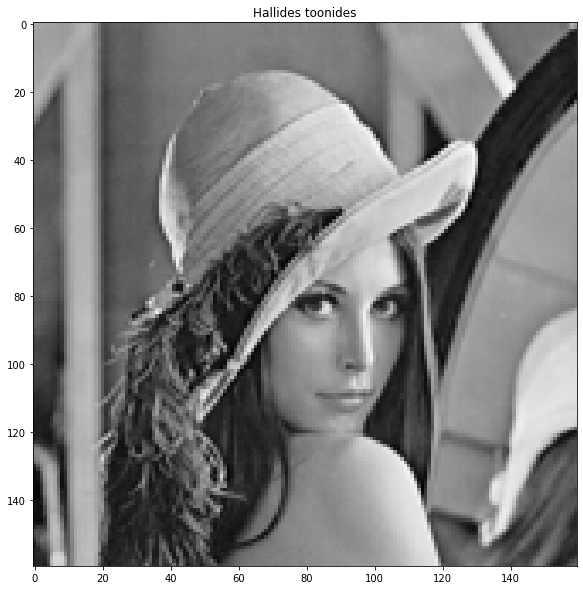

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(111),plt.imshow(imgGray, cmap='gray'),plt.title('Hallides toonides')
plt.show()

## Sobel

Selliseid filtreid, mida saab pildi töötlemiseks kasutada, on erinevaid.

Nt Sobel filter on filter, mida kasutatakse äärte tuvastamiseks. Pilt käiakse filtriga üle. Nt võetakse baasiks 3x3 maatriks ja 3x3 piksli kaupa liigutakse üle pildi ja töödeldakse seda. 

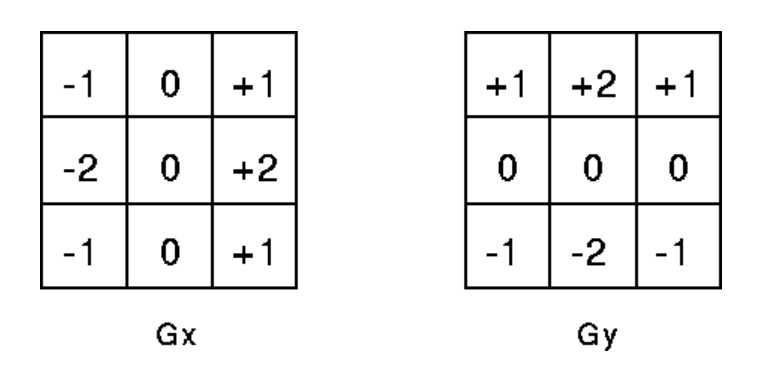

In [23]:
def sobel(image, kernel, r, c):
    img_k = image[c:c+3,r:r+3]
    total = np.sum(img_k*kernel)
    return total

In [24]:
# Võrdleme pildiga ja saame aru, et siin rakendatakse vertikaalset Sobel filtrit.
kernel = np.array([[1,0,-1], [2,0,-2],[1,0,-1]])

# Võtame tsükli jaoks mõõdud
sobel_img = np.zeros((imgGray.shape))

# Käime pildi üle 3x3 ruudustikuna
for r in range(1, imgGray.shape[0]-1):
    for c in range(1, imgGray.shape[1]-1):
        sobel_img[c][r] = sobel(imgGray, kernel, r-1, c-1)

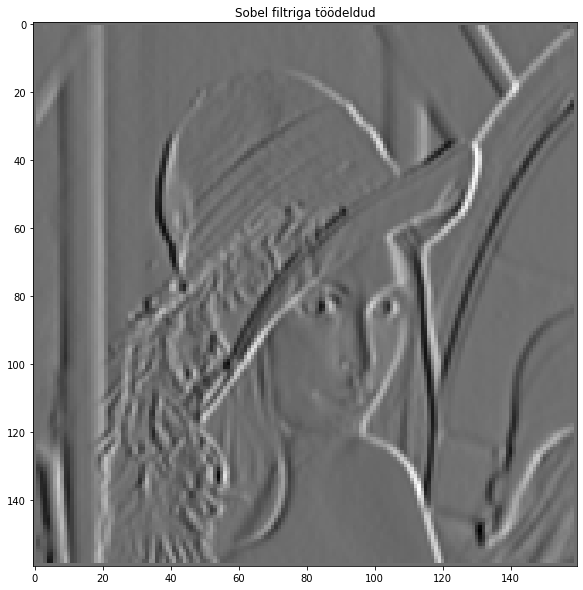

In [25]:

plt.figure(figsize=(20,10))
plt.subplot(111),plt.imshow(sobel_img, cmap='gray'),plt.title('Sobel filtriga töödeldud')
plt.show()